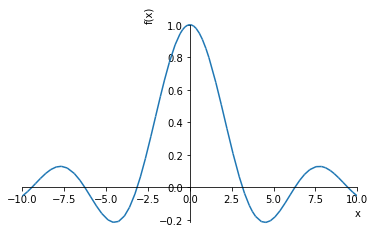

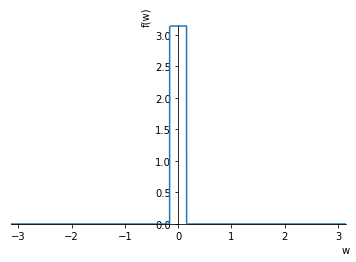

<function sinc at 0x7fe2580d1de8>


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

x, w = sym.symbols('x w')

ir = sym.sinc(x)
tf = sym.fourier_transform(ir, x, w)

sym.plotting.plot(ir, (x,-10,10))
sym.plotting.plot(tf, (w,-sym.pi, sym.pi))

print np.sinc

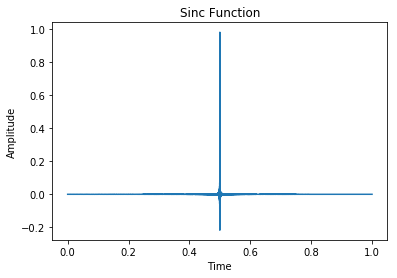

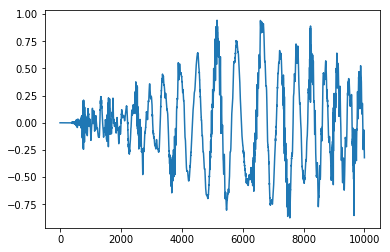

In [49]:
import scipy.io.wavfile as audio
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import numpy.lib

fs, data = audio.read('Filter_Design/filter_design.wav','r')
data = data[0:10000]
data = data/(256.*128.)

x = np.linspace(-5000, 5000, fs)
filt = np.sinc(x)
n = np.linspace(0,1,fs)

plt.title('Sinc Function')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(n,filt)
plt.show()

plt.plot(data)
plt.show()


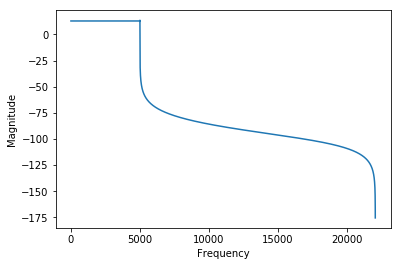

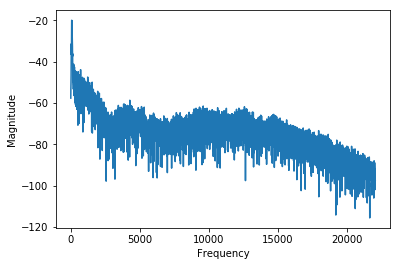

In [51]:
FILT = np.fft.fft(filt)
FILT = FILT[0:len(FILT)/2]

w = np.linspace(0,(fs/2),len(FILT))
mag_filter = 20*np.log10(np.abs(FILT))


plt.xlabel("Frequency")
plt.ylabel('Magnitude')
plt.plot(w,mag_filter)
plt.show()

DATA = np.fft.fft(data)/len(data)
DATA = DATA[0:len(DATA)/2]

w = np.linspace(0,(fs/2),len(DATA))
mag_audio = 20*np.log10(np.abs(DATA))

plt.xlabel("Frequency")
plt.ylabel('Magnitude')
plt.plot(w,mag_audio)
plt.show()


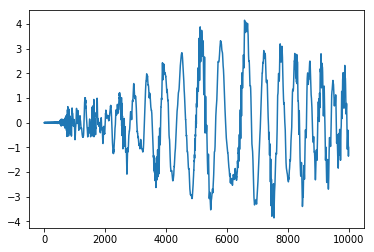

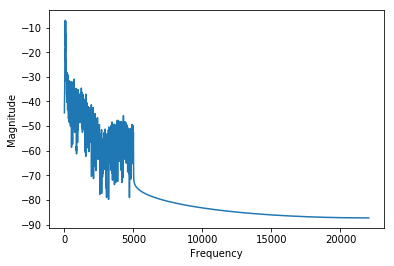

In [52]:
# padded_filter = np.lib.pad(y, (0,len(data)-len(y)), 'constant', constant_values=(0))
filtered_audio = scipy.signal.fftconvolve(data, filt, mode='same')

plt.plot(filtered_audio)
plt.show()

FILT_AUDIO = np.fft.fft(filtered_audio)/len(filtered_audio)
FILT_AUDIO = FILT_AUDIO[0:len(FILT_AUDIO)/2]

w = np.linspace(0,(fs/2),len(FILT_AUDIO))
mag_filtered_audio = 20*np.log10(np.abs(FILT_AUDIO))

plt.xlabel("Frequency")
plt.ylabel('Magnitude')
plt.plot(w,mag_filtered_audio)
plt.show()

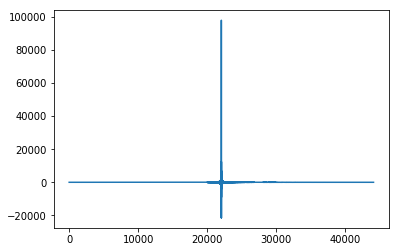

In [53]:
window = np.hanning(len(filt))*100000

windowed_filt = np.multiply(window, filt)

plt.plot(windowed_filt)
plt.show()

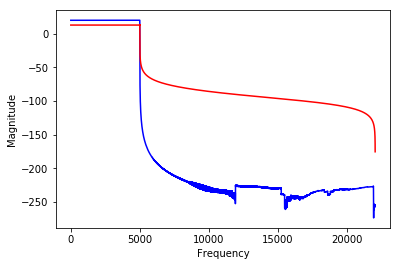

In [54]:
WIND_FILT = np.fft.fft(windowed_filt)/len(windowed_filt)
WIND_FILT = WIND_FILT[0:len(WIND_FILT)/2]

w = np.linspace(0,(fs/2),len(WIND_FILT))
mag_windowed_filt = 20*np.log10(np.abs(WIND_FILT))

plt.xlabel("Frequency")
plt.ylabel('Magnitude')
plt.plot(w,mag_windowed_filt, 'b', w, mag_filter, 'r')
plt.show()

#filtered_audio2 = scipy.signal.fftconvolve(data, output, mode='same')
# plt.plot(filtered_audio2)
# plt.show()

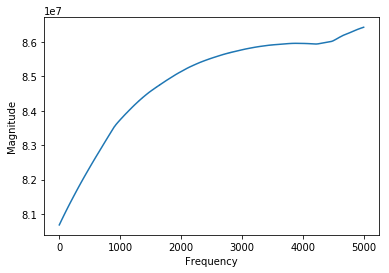

In [66]:
wind_filtered_audio = scipy.signal.fftconvolve(mag_audio, mag_windowed_filt, mode='same')
plt.xlabel("Frequency")
plt.ylabel('Magnitude')
plt.plot(wind_filtered_audio)
plt.show()